In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasus.csv")

/home/sergio/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM',
       'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A',
       'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT',
       'NIV_HIER', 'TERCEIRO', 'TP_LEITO', 'CODLEITO', 'QT_EXIST', 'QT_CONTR',
       'QT_SUS', 'QT_NSUS', 'COMPETEN', 'NAT_JUR', 'CNES_integer', 'FANTASIA',
       'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat',
       'munResLon', 'munResAlt', 'munResArea', 'mes', 'ano'],
      dtype='object')

In [4]:
df.dtypes

CNES            float64
CODUFMUN        float64
REGSAUDE         object
MICR_REG        float64
DISTRSAN        float64
DISTRADM         object
TPGESTAO         object
PF_PJ            object
CPF_CNPJ        float64
NIV_DEP          object
CNPJ_MAN        float64
ESFERA_A        float64
ATIVIDAD         object
RETENCAO        float64
NATUREZA        float64
CLIENTEL         object
TP_UNID          object
TURNO_AT         object
NIV_HIER        float64
TERCEIRO        float64
TP_LEITO        float64
CODLEITO        float64
QT_EXIST        float64
QT_CONTR        float64
QT_SUS          float64
QT_NSUS         float64
COMPETEN        float64
NAT_JUR         float64
CNES_integer    float64
FANTASIA         object
munResStatus     object
munResTipo       object
munResNome       object
munResUf         object
munResLat       float64
munResLon       float64
munResAlt       float64
munResArea      float64
mes             float64
ano             float64
dtype: object

In [5]:
df = df[1:]

## Análise 

### Objetivo

Minha ideia é usar dados dos leitos hospitalares do estado de Goiás para verificar se o governo destinou corretamente os recursos para contenção da pandemia de Covid - 19.

### Método

O primeiro passo é verificar se houve aumento na oferta dos leitos. Também precisamos saber se esse aumento acompanhou o aumento na demanda, se os munícipios mais atingidos foram amparados e se o aumento na quantidade de leitos trouxe impacto positivo na contenção da pandemia.

### Aumento de leitos

Vou iniciar verificando de forma simples se houve aumento no número de leitos, de quanto foi, se o aumento foi maior do que o natural (pré-pandemia), se houve decréscimo em algum momento, entre outros fatores.

In [6]:
df_leitos = df[["ano", "mes", "QT_EXIST", "QT_NSUS", "QT_SUS", "munResNome"]]

In [7]:
df_leitos["data"] = pd.to_datetime(df_leitos["mes"].astype(int).astype(str) + "/" + df_leitos["ano"].astype(int).astype(str))

In [8]:
is_pand = [0]*len(df_leitos[(df_leitos["data"]<="2020/1")]) + [1]*len(df_leitos[(df_leitos["data"]>"2020/1")])

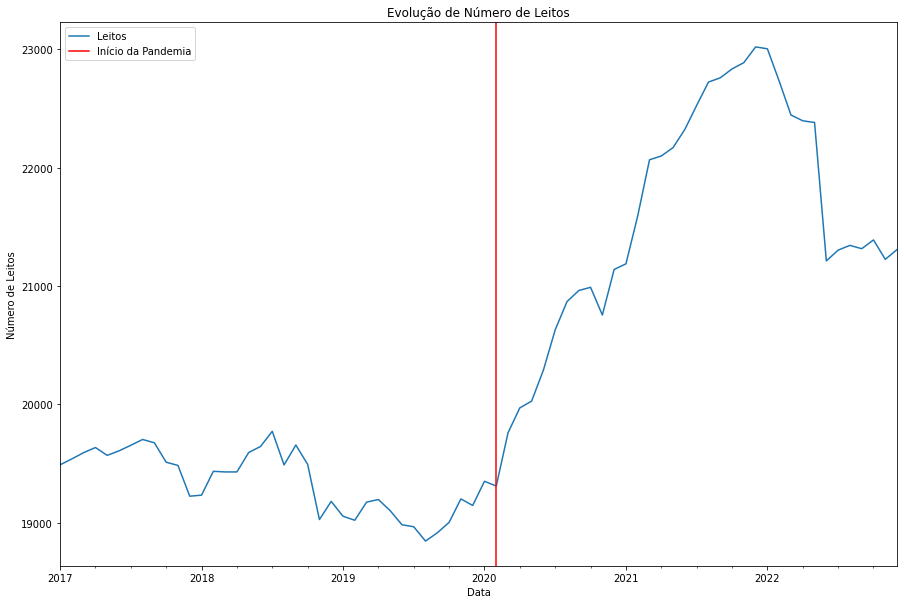

In [9]:
fig, ax = plt.subplots(1)
df_leitos.groupby("data").sum().plot(y="QT_EXIST", figsize=(15, 10), ax=ax)
plt.xlabel("Data")
plt.ylabel("Número de Leitos")
plt.axvline(x="2020/2", color="red", label="vline")

labels = ["Leitos", "Início da Pandemia"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)

plt.title("Evolução de Número de Leitos")
plt.show()

É possível ver a evolução nos leitos constante após a linha vermelha, que marca fevereiro de 2020, o início da pandemia. A evolução é contínua até o início de 2022, quando começa a ocorrer a diminuição da quantidade de leitos.

Agora, vou seguir a análise tentando responder as seguintes questões:

- O quanto o governo foi responsável por essa evolução? (Leitos SUS x Leitos NÃO-SUS)
- Quais munícipios foram mais beneficiados?

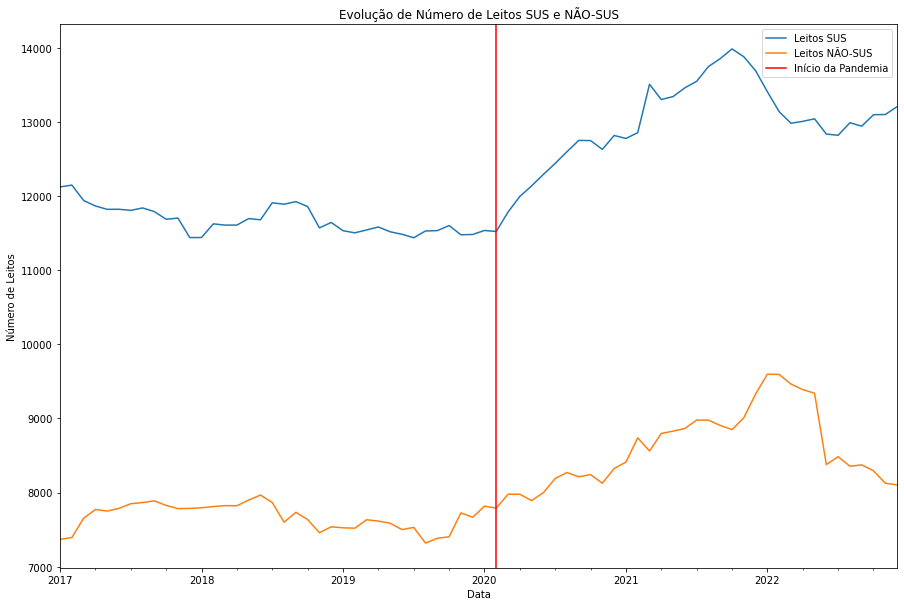

In [10]:
fig, ax = plt.subplots(1)
df_leitos.groupby("data").sum().plot(y="QT_SUS", figsize=(15, 10), ax=ax)
df_leitos.groupby("data").sum().plot(y="QT_NSUS", figsize=(15, 10), ax=ax)
plt.xlabel("Data")
plt.ylabel("Número de Leitos")
plt.axvline(x="2020/2", color="red", label="vline")

labels = ["Leitos SUS", "Leitos NÃO-SUS", "Início da Pandemia"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)

plt.title("Evolução de Número de Leitos SUS e NÃO-SUS")
plt.show()

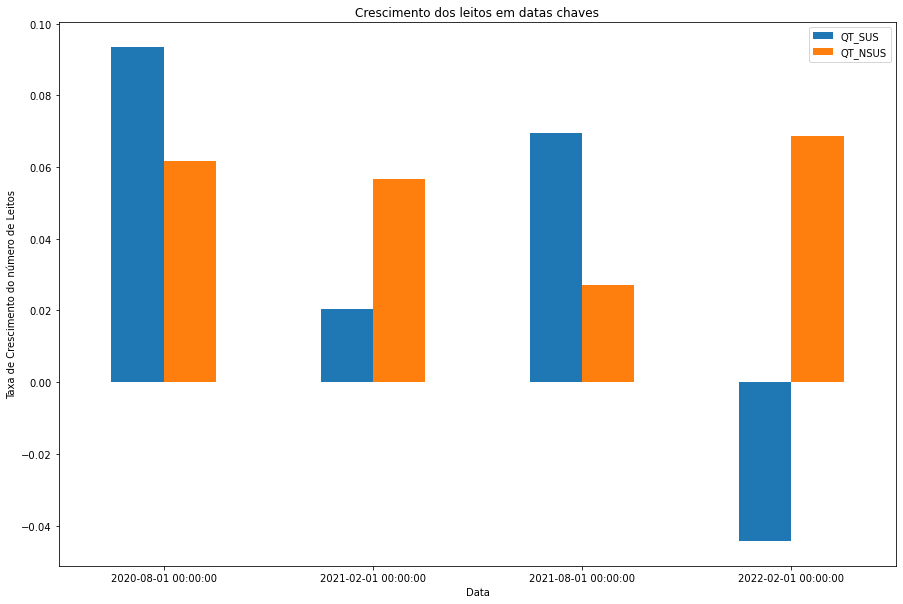

In [11]:
key_dates = ["2020/2", "2020/8", "2021/2", "2021/8", "2022/2"]

df_ev_leitos = df_leitos.groupby("data").sum()[["QT_SUS", "QT_NSUS"]]
df_ev_leitos[df_ev_leitos.index.isin(key_dates)].pct_change().dropna().plot(kind="bar", figsize=(15, 10), rot=0)
plt.ylabel("Taxa de Crescimento do número de Leitos")
plt.xlabel("Data")
plt.title("Crescimento dos leitos em datas chaves")
plt.show()

É possível verificar que tanto os leitos SUS quanto Não-SUS cresceram na pandemia, apresentando uma taxa de crescimento alta nos primeiros seis meses. 

É interessante analisar que os leitos SUS cresceram muito nos primeiros 6 meses de pandemia e após 1 ano de pandemia. Enquanto os leitos NÃO-SUS continuaram crescendo a uma taxa quase igual durante todo o primeiro ano, decaiu após um ano e teve que aumentar novamente após um ano e meio. 

O objetivo agora vai ser identificar os munícipios que apresentaram maior crescimento, e também verificar o impacto trazido entre a ampliação de leitos e o número de mortes.

Vou iniciar checando o caso da capital, Goiânia.

In [12]:
df_gn = df_leitos[df_leitos["munResNome"] == "Goiânia"]

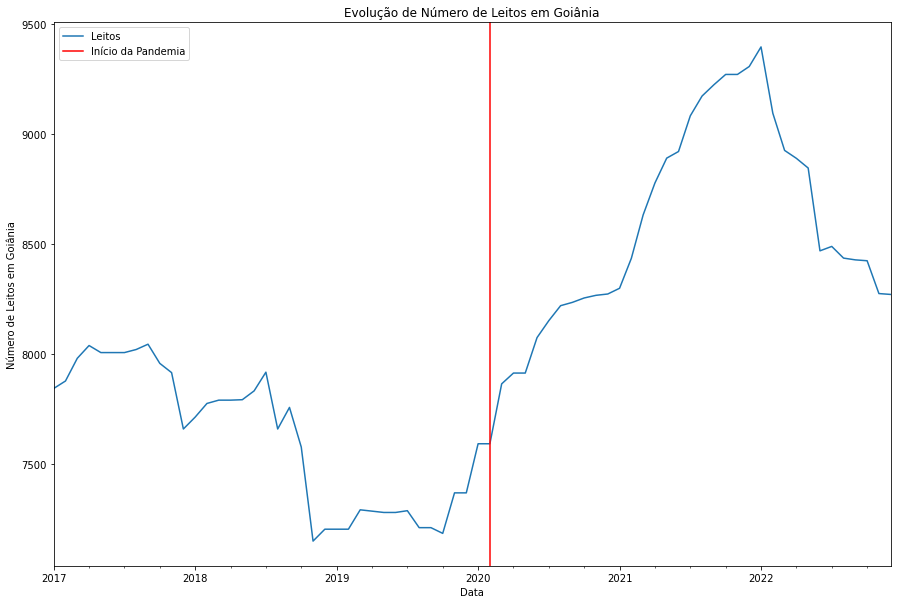

In [13]:
fig, ax = plt.subplots(1)
df_gn.groupby("data").sum().plot(y="QT_EXIST", figsize=(15, 10), ax=ax)
plt.xlabel("Data")
plt.ylabel("Número de Leitos em Goiânia")
plt.axvline(x="2020/2", color="red", label="vline")

labels = ["Leitos", "Início da Pandemia"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)

plt.title("Evolução de Número de Leitos em Goiânia")
plt.show()

O padrão em Goiânia é muito parecido com o visto no estado todo, além disso, a cidade é a com maior quantidade de leitos do estado. Isso faz com que pensamos: O número de Goiânia faz com que não vejamos o padrão real do estado?
Para responder isso, vou selecionar os 10 munícipios com maior população e fazer a mesma análise.

In [14]:
df = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Goi%C3%A1s_por_popula%C3%A7%C3%A3o")[0]

In [15]:
muns = [a for a in df[df.columns[1]].values if "Mais de" not in a]

In [16]:
top_10 = muns[:10]

In [17]:
##municipios com maior população de Goiás
top_10

['Goiânia',
 'Aparecida de Goiânia',
 'Anápolis',
 'Rio Verde',
 'Águas Lindas de Goiás',
 'Valparaíso de Goiás',
 'Luziânia',
 'Senador Canedo',
 'Trindade',
 'Itumbiara']

Minha ideia é comparar o número de leitos dos municípios na mesma escala, para saber quais de fato tiveram o maior crescimento. Dessa forma, irei colocar todos os município na mesma escala, para evitar que munícipios com maior número de leitos se destaquem.

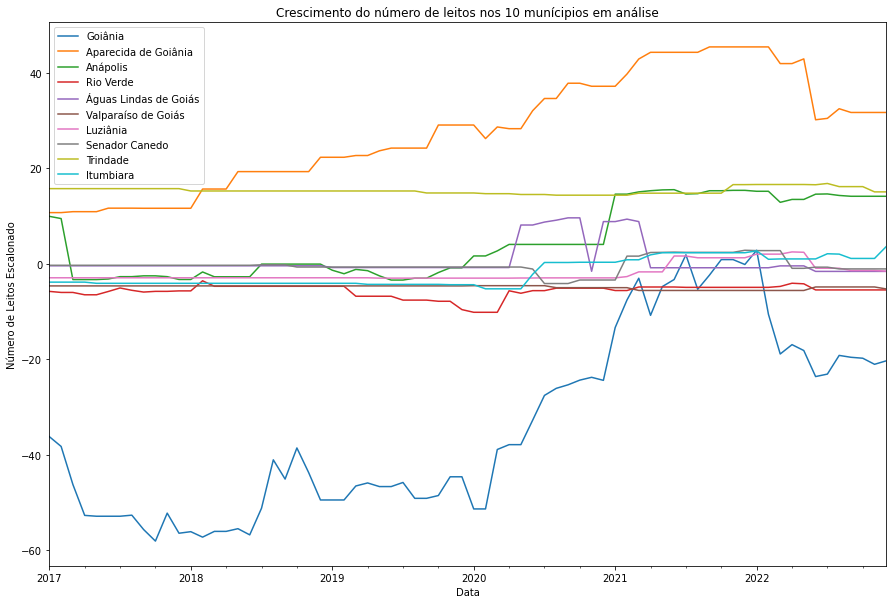

In [18]:
fig, ax = plt.subplots(1)
df_top_10 = df_leitos[df_leitos["munResNome"].isin(top_10)]

df_top_10["QT_EXIST"] = (df_top_10["QT_EXIST"] - df_top_10["QT_EXIST"].mean()) / df_top_10["QT_EXIST"].std()

for m in top_10:
    df_mun = df_top_10[df_top_10["munResNome"] == m]
    
    df_mun.groupby("data").sum().plot(y="QT_EXIST", ax=ax, figsize=(15, 10), label=m)

plt.xlabel("Data")
plt.ylabel("Número de Leitos Escalonado")
plt.title("Crescimento do número de leitos nos 10 munícipios em análise")
plt.show()

O caso de Itumbiara e Aparecida de Goiânia parecem interessantes, porque entre os municípios de maior população, eles que apresentam o maior crescimento. Por que isso aconteceu? Um dos motivos pode ser a quantidade de mortos e casos por municípios. Para analisar isso, vou obter os dados de mortes e casos por municípios de Goiás. 

In [19]:
casos = pd.read_csv("caso_full.csv")

In [20]:
casos.columns

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

In [21]:
casos["data"] = pd.to_datetime(pd.to_datetime(casos["date"]).dt.month.astype(str) + "/" + pd.to_datetime(casos["date"]).dt.year.astype(str))

In [22]:
casos = casos[["data", "city", "new_confirmed", "new_deaths", "estimated_population"]]

Vou verificar se existe uma correlação entre o crescimento de casos e o crescimento de leitos, para cidade de Itumbiara.

In [23]:
casos_itu = casos[casos.city.isin(["Itumbiara"])].groupby("data").sum()[["new_confirmed", "new_deaths"]]
leitos_itu = df_leitos[df_leitos.munResNome.isin(["Itumbiara"])].groupby("data").sum()["QT_EXIST"]
itu = pd.merge(casos_itu, leitos_itu, left_index=True, right_index=True)
itu = itu[itu.index < "2021-12-01"]

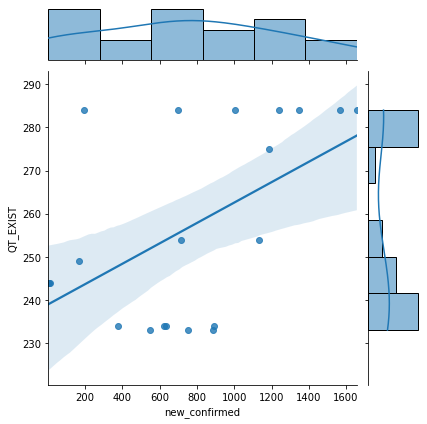

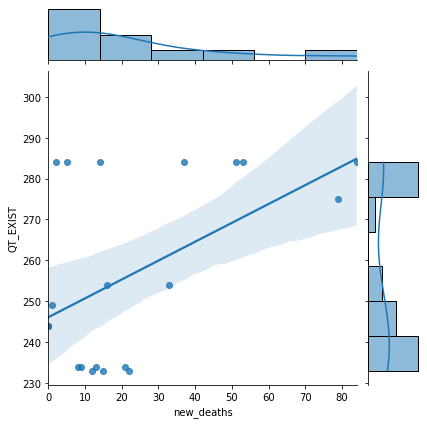

In [24]:
#fig, ax = plt.subplots(2)
sns.jointplot(data = itu, x = 'new_confirmed', y = 'QT_EXIST', kind="reg")

sns.jointplot(data = itu, x = 'new_deaths', y = 'QT_EXIST', kind="reg")

plt.show()

Acima, pode-se observar que a quantidade de mortos e de casos está condizente com crescimento de leitos, para cidade de Itumbiara.

Também podemos analisar se, entre essas 10 cidades, as mais atingidas pela covid foram realmente as que tiveram maior crescimento de leitos entre elas, como Itumbiara e Aparecida de Goiânia

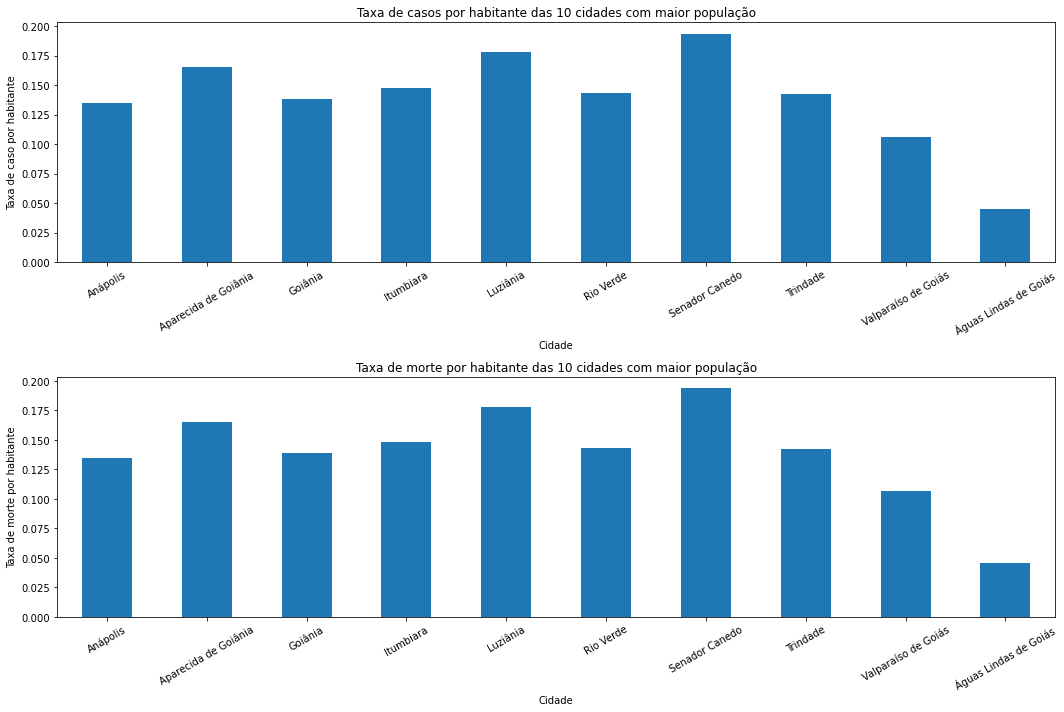

In [25]:
fig, ax = plt.subplots(2)
casos_pop = casos[casos.city.isin(top_10)].sort_values("city").groupby("city").sum()["new_confirmed"]/casos[casos.city.isin(top_10)][["city", "estimated_population"]].drop_duplicates("city").sort_values("city").set_index("city")["estimated_population"]
deaths_pop = casos[casos.city.isin(top_10)].sort_values("city").groupby("city").sum()["new_deaths"]/casos[casos.city.isin(top_10)][["city", "estimated_population"]].drop_duplicates("city").sort_values("city").set_index("city")["estimated_population"]

casos_pop.plot(kind="bar", figsize=(15, 10), rot=30, ax=ax[0])
ax[0].set_ylabel("Taxa de caso por habitante")
ax[0].set_xlabel("Cidade")
ax[0].set_title("Taxa de casos por habitante das 10 cidades com maior população")

casos_pop.plot(kind="bar", figsize=(15, 10), rot=30, ax=ax[1])
ax[1].set_ylabel("Taxa de morte por habitante")
ax[1].set_xlabel("Cidade")
ax[1].set_title("Taxa de morte por habitante das 10 cidades com maior população")
fig.tight_layout()
plt.show()

Pode-se observar que as cidades de Itumbiara e Aparecida de Goiânia, que apresentam maior crescimento proporcional de leitos, são a 3ª e a 4ª com mais casos e mortes por habitante. Isso pode justificar o alto aumento de leitos que ocorreu nessas cidades.

Vamos analisar o panorama para todo estado, considerando casos e mortes e a construção de novos leitos.

In [26]:
casos_grow = casos.groupby("data").sum()[["new_confirmed", "new_deaths"]]
leitos_grow = df_leitos.groupby("data").sum()["QT_EXIST"]

tot = pd.merge(casos_grow, leitos_grow, left_index=True, right_index=True)
tot = tot[tot.index < "2021-12-01"]

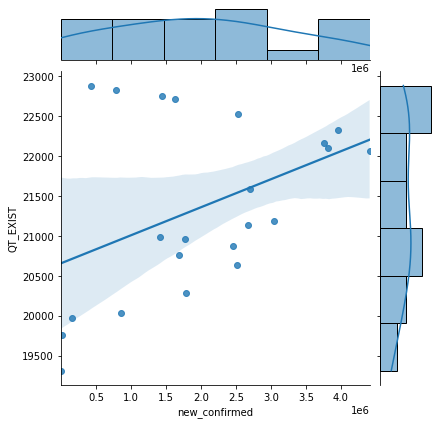

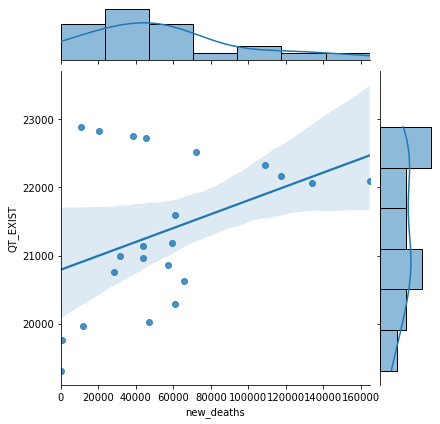

In [27]:
#fig, ax = plt.subplots(2)
sns.jointplot(data = tot, x = 'new_confirmed', y = 'QT_EXIST', kind="reg")

sns.jointplot(data = tot, x = 'new_deaths', y = 'QT_EXIST', kind="reg")

plt.show()

No estado de Goiás, é possível observar que o aumento de leitos é proporcional ao de casos e mortes. Vamos verificar a curva para os dois casos. O esperado é que, em casos falta de crescimento nos casos, os leitos ou continuem constantes ou diminuam, enquanto que em momentos críticos os leitos aumentem. 

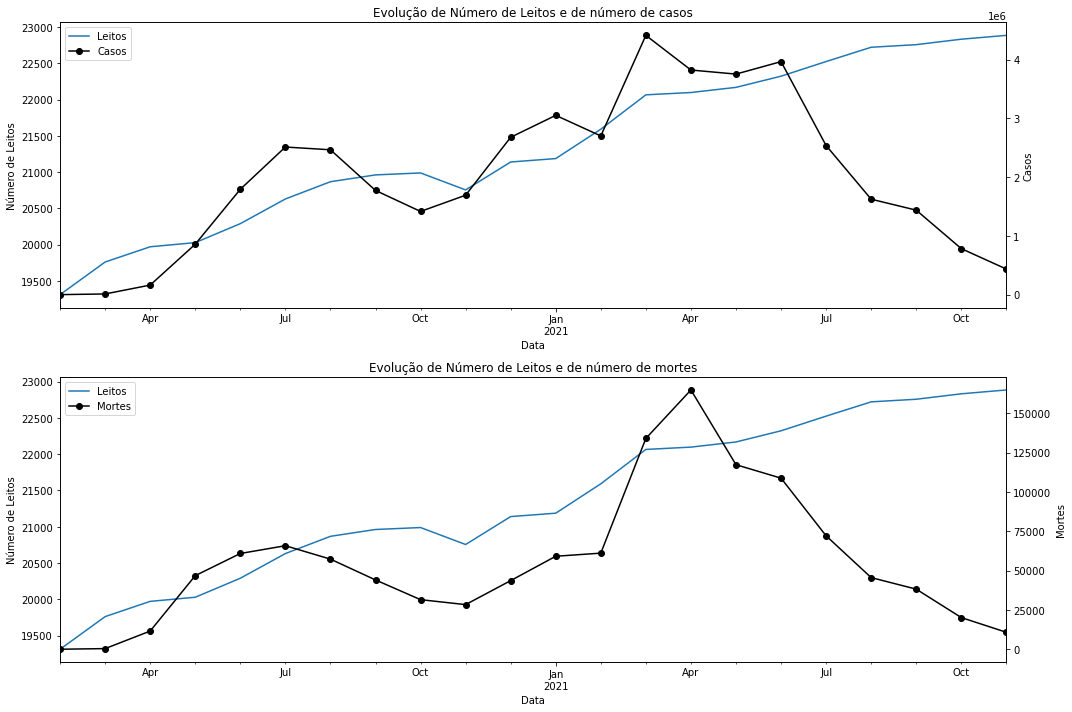

In [28]:
fig, ax = plt.subplots(2)
tot.plot(y="QT_EXIST", ax=ax[0], label="Leitos").set_ylabel("Número de Leitos")
tot["new_confirmed"].plot(secondary_y=True, color='k', marker='o', ax=ax[0], label="Casos").set_ylabel("Casos")
ax[0].set_xlabel("Data")

lines = ax[0].get_lines() + ax[0].right_ax.get_lines()
ax[0].legend(lines, [l.get_label() for l in lines])

ax[0].set_title("Evolução de Número de Leitos e de número de casos")

tot.plot(y="QT_EXIST", figsize=(15, 10), ax=ax[1], label="Leitos").set_ylabel("Número de Leitos")
tot["new_deaths"].plot(secondary_y=True, color='k', marker='o', ax=ax[1], label="Mortes").set_ylabel("Mortes")
ax[1].set_xlabel("Data")

lines = ax[1].get_lines() + ax[1].right_ax.get_lines()
ax[1].legend(lines, [l.get_label() for l in lines])

ax[1].set_title("Evolução de Número de Leitos e de número de mortes")
fig.tight_layout()
plt.show()

Como mostrado, o número de leitos aumenta continuamente. Em alguns períodos, de diminuição de casos, como entre julho a novembro de 2020, ocorreu um crescimento de leitos numa taxa menor e até a diminuição em algum momento, voltando a aumentar quando os casos retornaram. Até o fim do período onde se tem dados de casos de covid em Goiás (fim de 2021), mesmo com a diminuição na quantidade de casos, foi mantido a grande quantidade de leitos criados na segunda onda.

## Conclusão

Por meio dessa análise, foi possível analisar alguns aspectos da disponibilização de leitos em Goiás:

- Alta correlação com quantidade de casos e mortes de covid, principalmente quando os números da doença subiam. Isso significa que o governo acredita que o aumento de leitos é uma boa resposta para a panddemia.
- Dentre as cidades mais populosas, o crescimento de leitos foi priorizado para locais com grande quantidade proporcional de casos
- Mesmo após a segunda onda de casos, no fim de 2020 até quase a metade de 2021, os leitos continuaram, começando a diminuir e voltar ao padrão pré-pandemia gradativamente, por volta da metade de 2022.

Dessa forma, é possível concluir que o governo de Goiás fez um trabalho efetivo na construção de leitos no estado durante a pandemia de Covid-19.